In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
%matplotlib inline

import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot

from sklearn.metrics import accuracy_score
import os

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()


In [3]:
df=pd.read_csv(r'iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 6)

In [8]:
df.drop('Id',axis = 1, inplace = True)

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

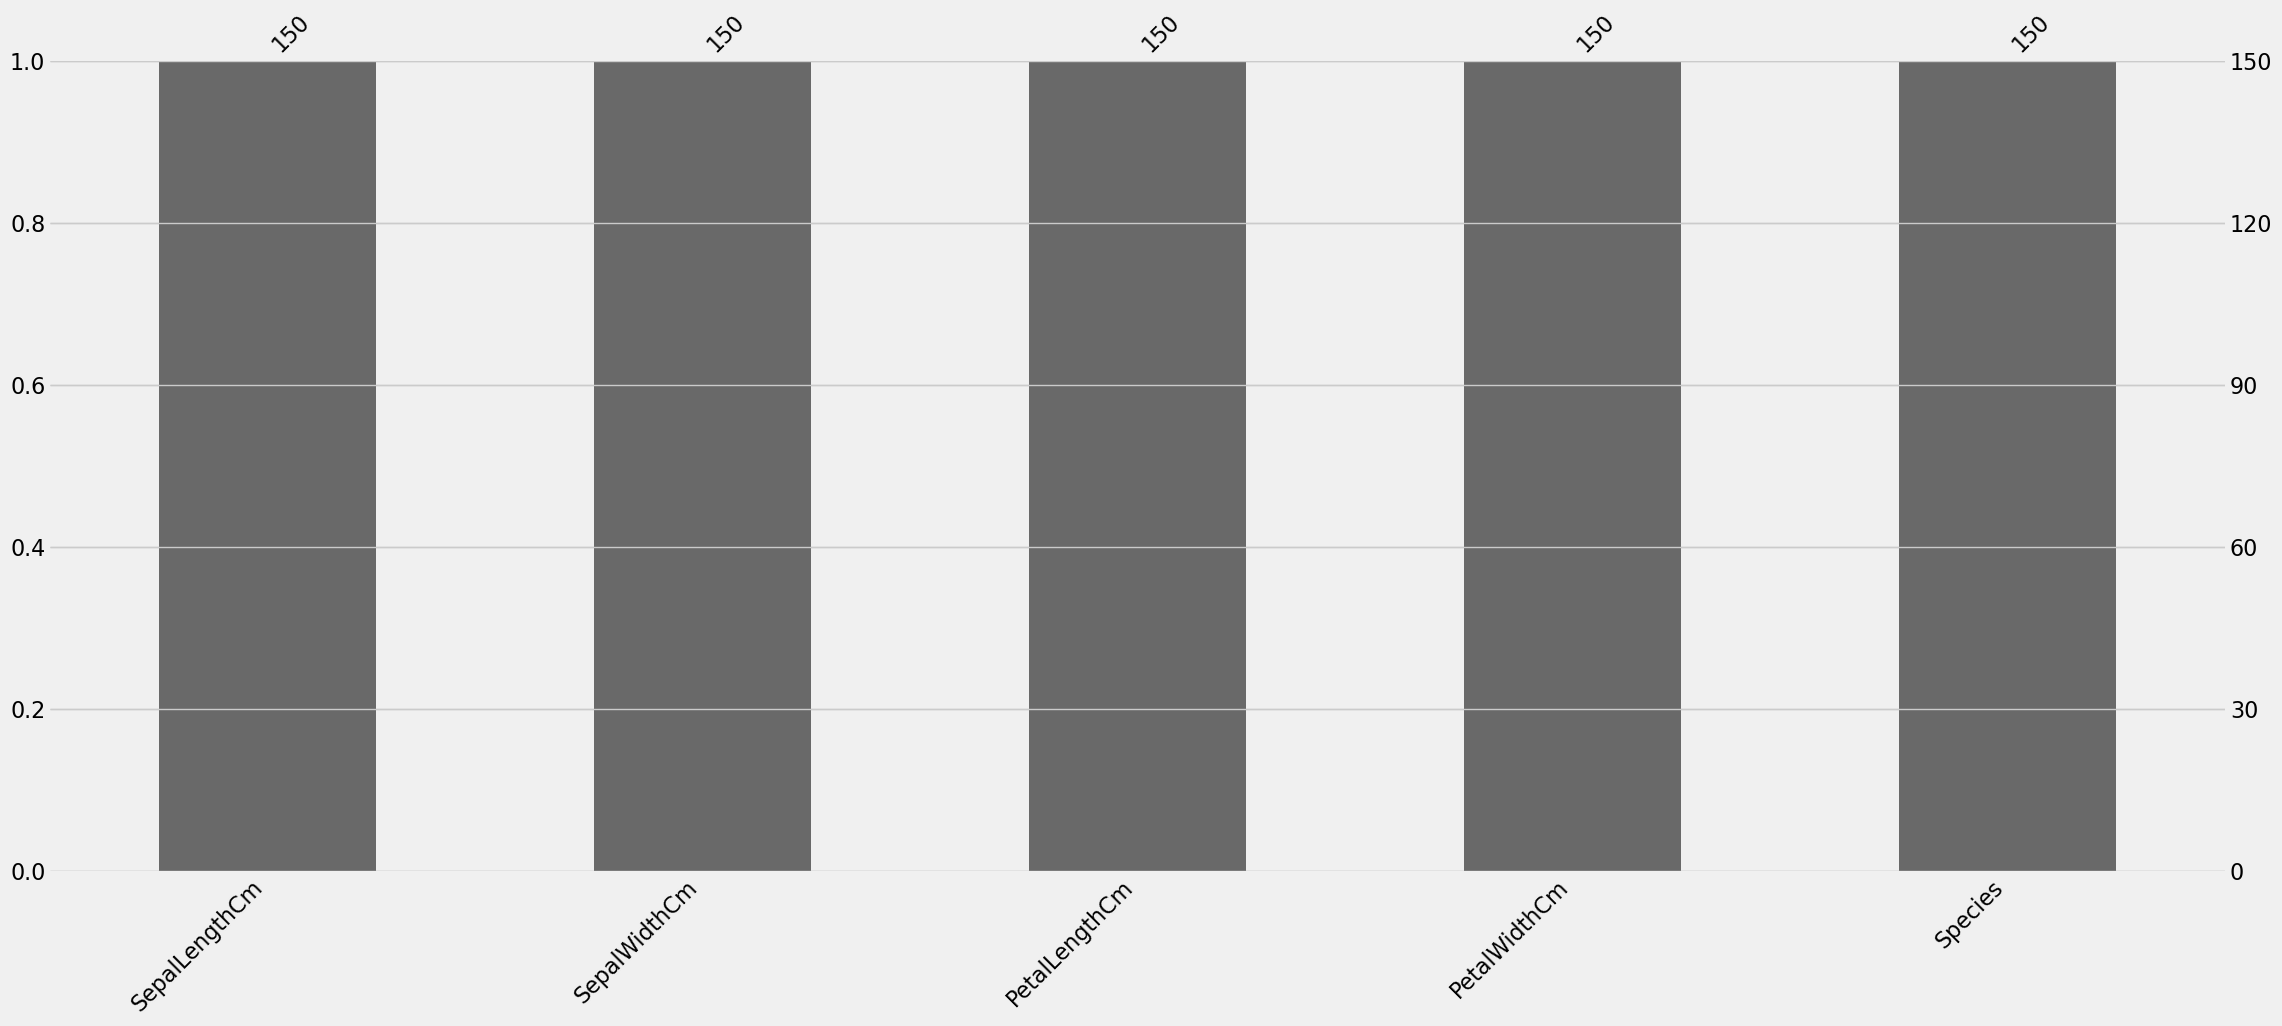

In [12]:
import missingno as msno
msno.bar(df)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.rename(columns={'SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth','PetalWidthCm':'PetalWidth','PetalLengthCm':'PetalLength'},inplace=True)

## EDA

In [15]:
# relationship between species and sepal length

<Axes: xlabel='Species', ylabel='SepalLength'>

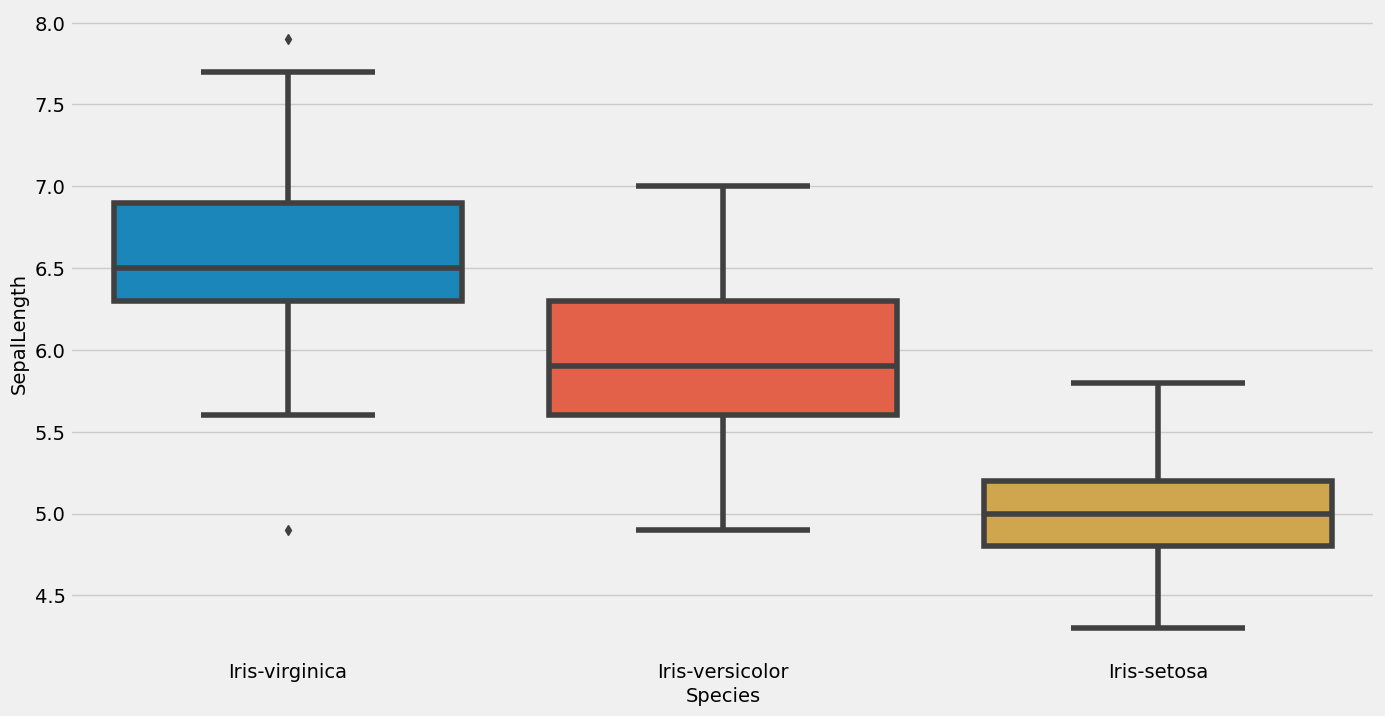

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLength',data=df.sort_values('SepalLength',ascending=False))

In [17]:
# relationship between species and sepal width

<Axes: xlabel='Species', ylabel='SepalWidth'>

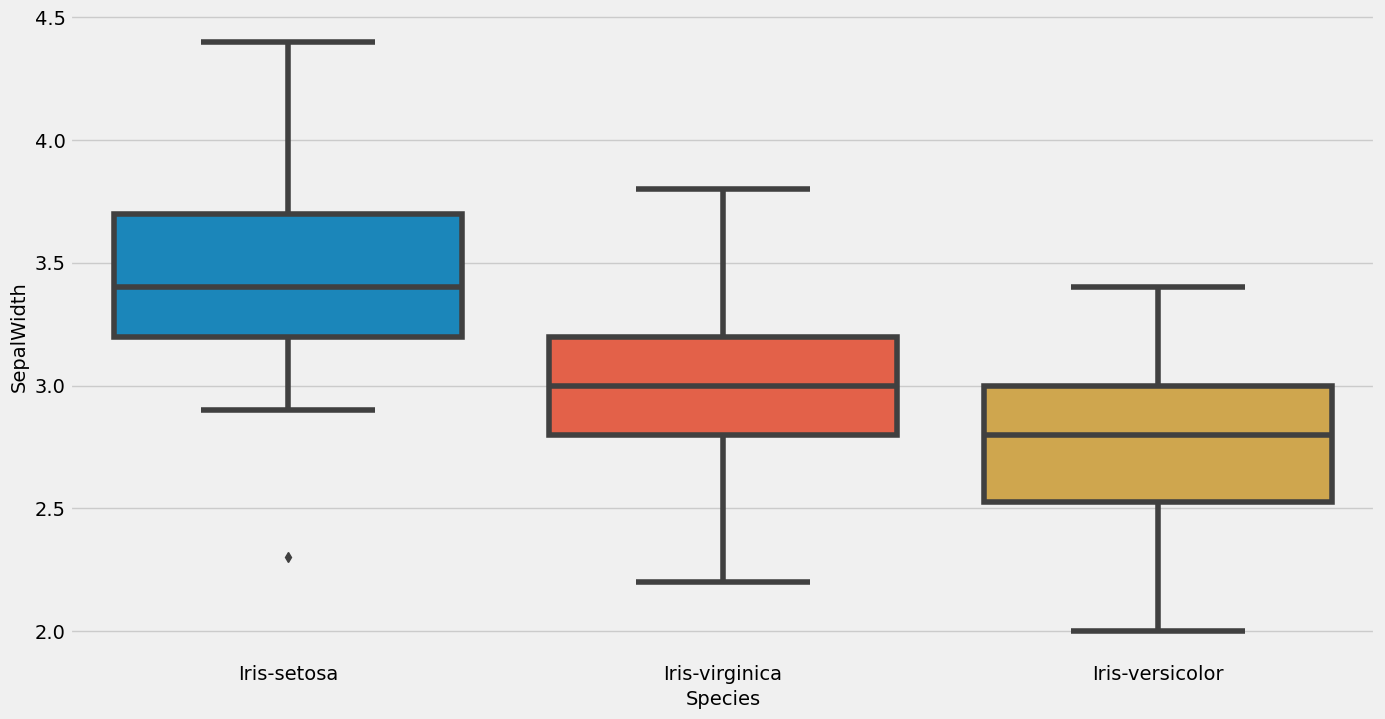

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalWidth',data=df.sort_values('SepalWidth',ascending=False))

In [19]:
print(df.columns)


Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')


In [20]:
# relationship between sepal width and sepal length

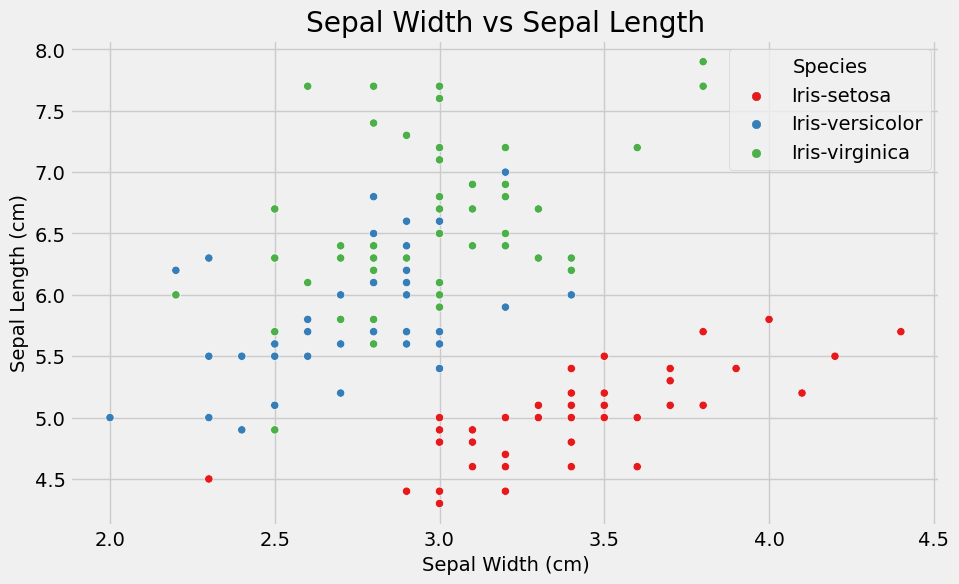

In [21]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SepalWidth', y='SepalLength', hue='Species', palette='Set1')
plt.title('Sepal Width vs Sepal Length')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.show()


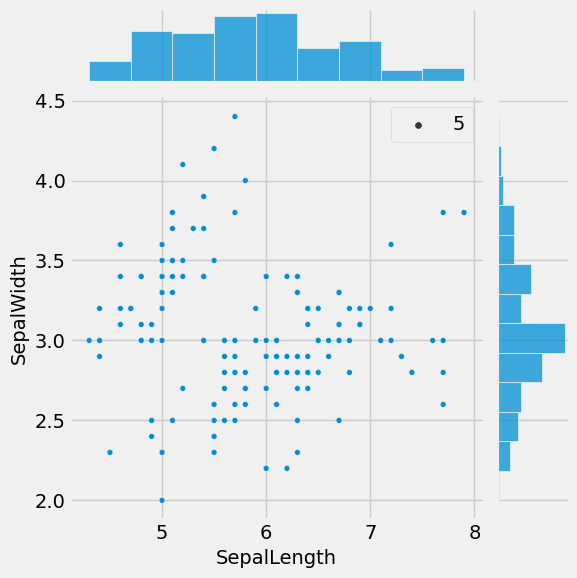

In [22]:
sns.jointplot(x="SepalLength", y="SepalWidth", data=df, size=5)

In [23]:
# pairplot

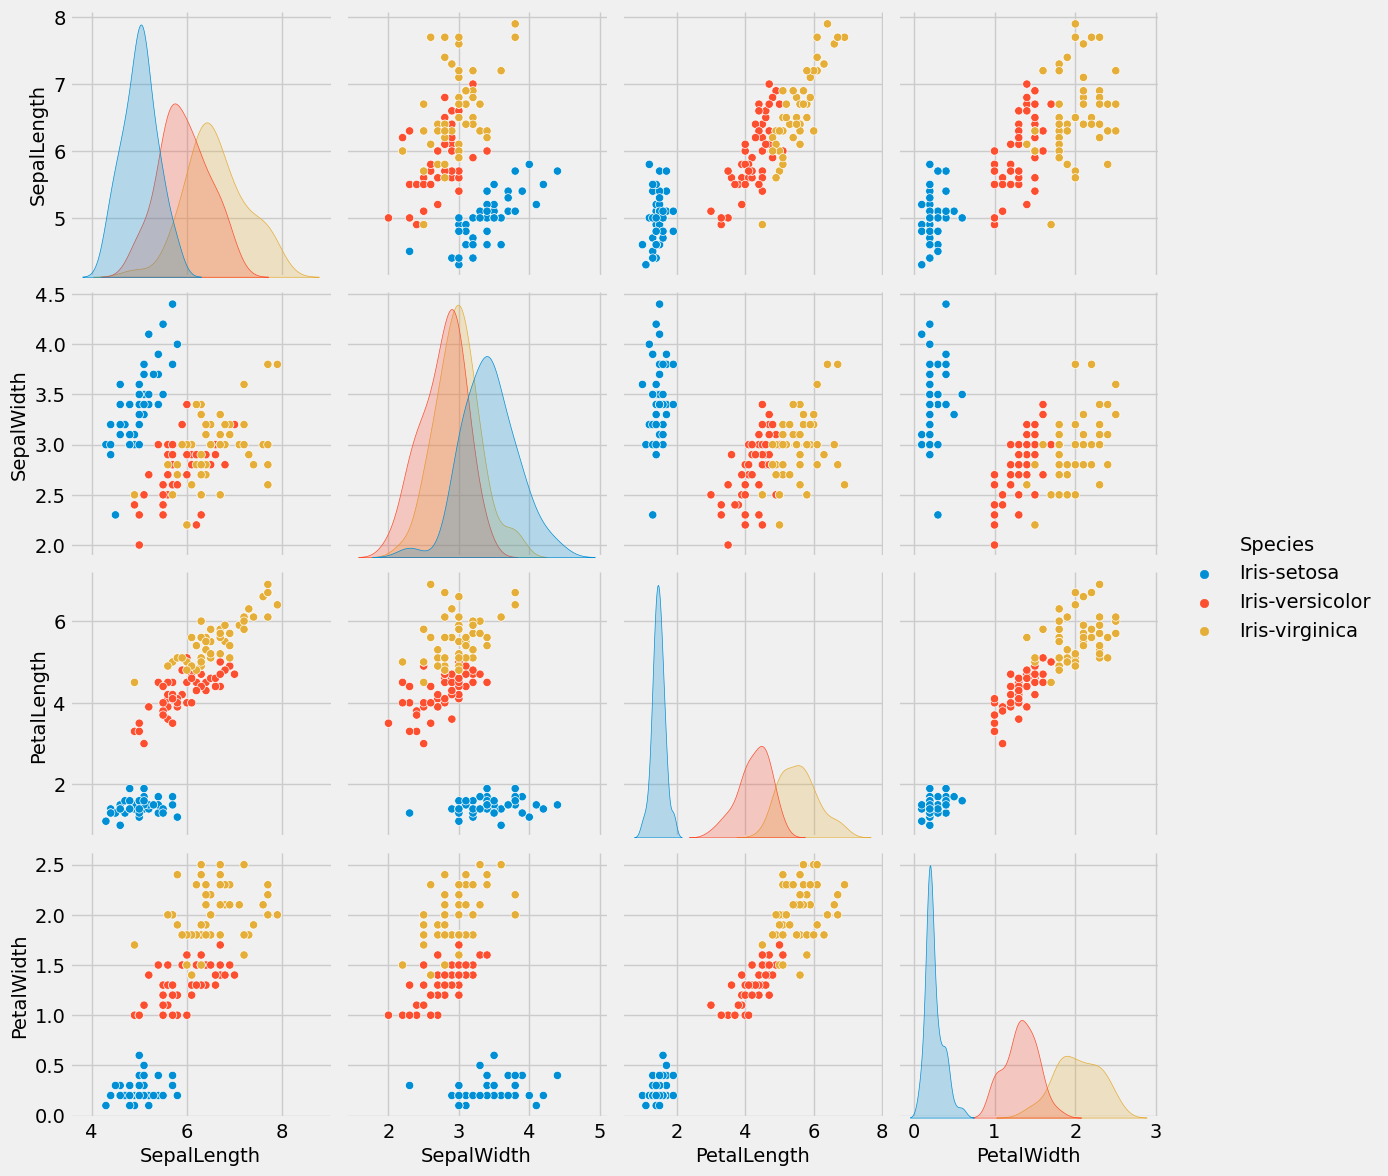

In [24]:
sns.pairplot(df, hue="Species", size=3)

In [25]:
# boxplot

array([[<Axes: title={'center': 'PetalLength'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidth'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLength'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidth'}, xlabel='[Species]'>]],
      dtype=object)

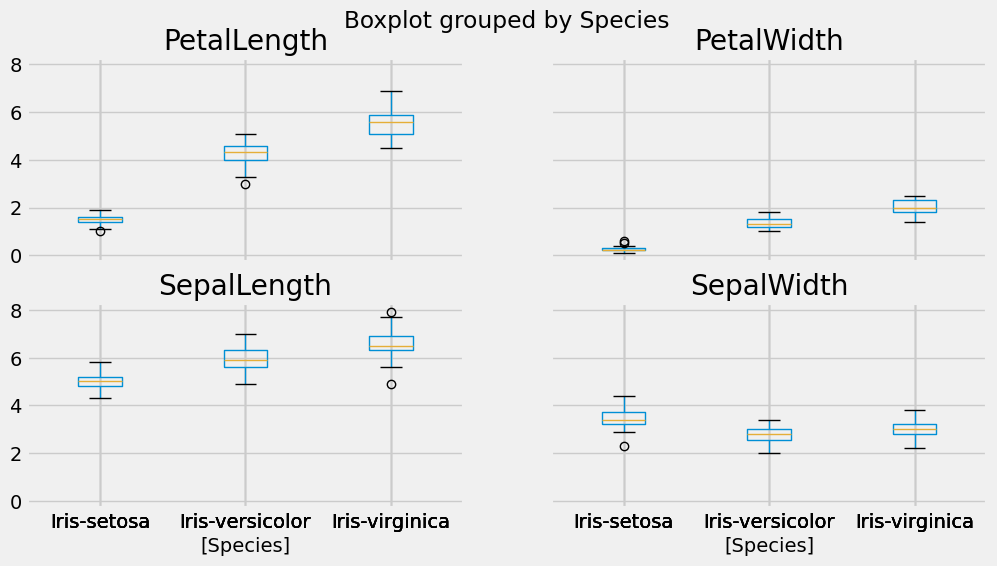

In [26]:
df.boxplot(by="Species", figsize=(12, 6))

In [27]:
# andrews curves

<Axes: >

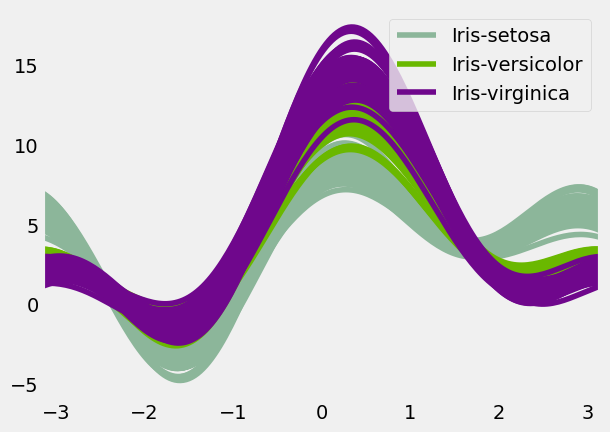

In [28]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

In [29]:
# violin plot

<Axes: xlabel='Species', ylabel='SepalWidth'>

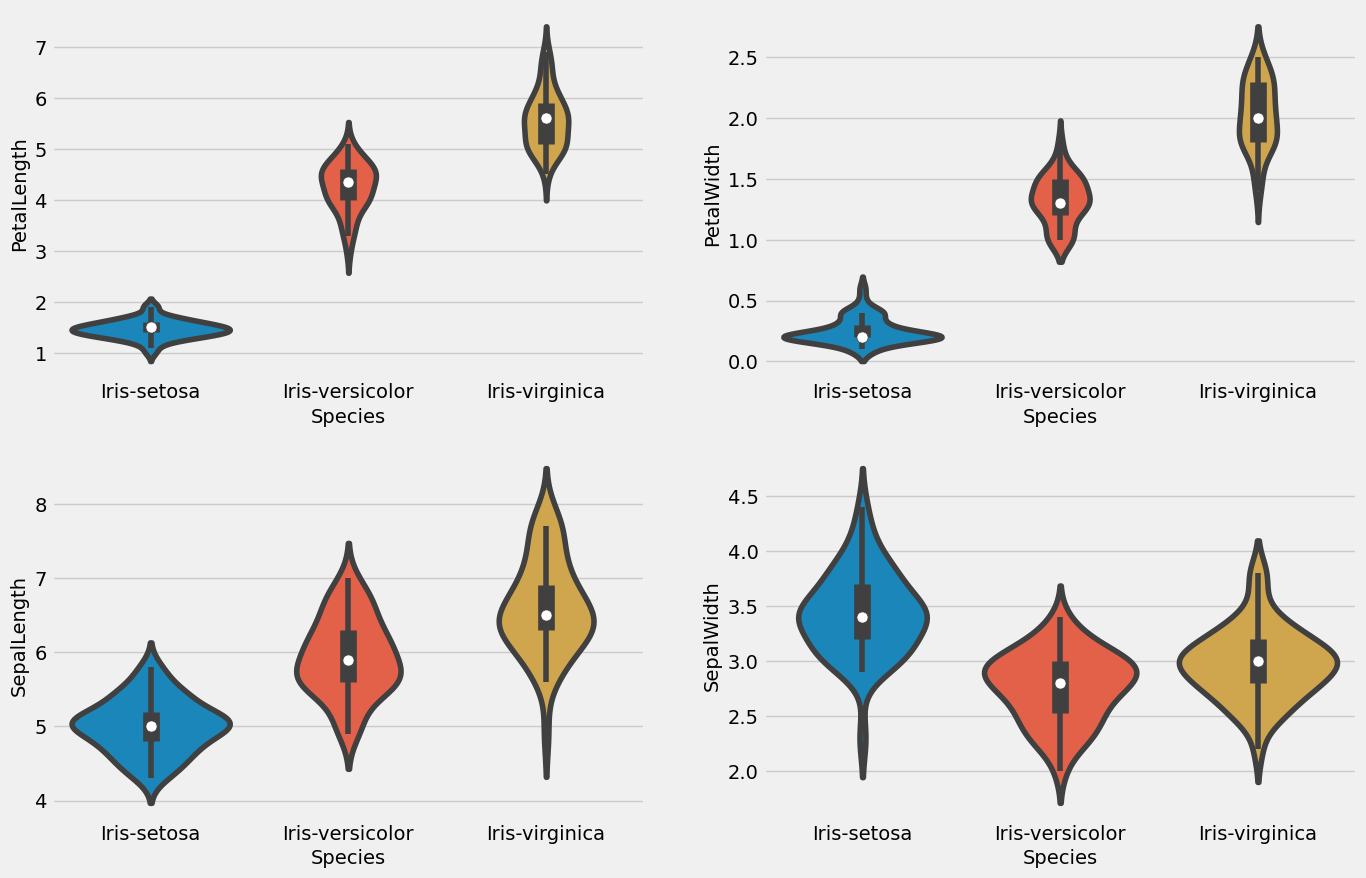

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLength',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidth',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLength',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidth',data=df)

In [31]:
px.scatter(df,x='Species',y='PetalWidth',size='PetalWidth')

In [32]:
df.iplot(kind='bar',x=['Species'],y=['PetalWidth'])

In [33]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
px.scatter_matrix(df,color='Species',title='Iris',dimensions=['SepalLength','SepalWidth','PetalWidth','PetalLength'])

In [35]:
x=df.drop(['Species'],axis=1)

In [36]:
x

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
y=df['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 147, dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [39]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
x=np.array(x)
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

In [41]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [42]:
x_train

array([[6.7, 3.1, 5.6, 2.4],
       [6.5, 3. , 5.5, 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [6. , 2.2, 4. , 1. ],
       [4.8, 3.1, 1.6, 0.2],
       [6.6, 2.9, 4.6, 1.3],
       [6.3, 2.3, 4.4, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [6.1, 3. , 4.9, 1.8],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 2.7, 4.2, 1.3],
       [7.7, 2.6, 6.9, 2.3],
       [7. , 3.2, 4.7, 1.4],
       [6.7, 3.3, 5.7, 2.5],
       [7.1, 3. , 5.9, 2.1],
       [4.3, 3. , 1.1, 0.1],
       [6.2, 2.2, 4.5, 1.5],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 3. , 4.1, 1.3],
       [7.2, 3. , 5.8, 1.6],
       [5.7, 4.4, 1.5, 0.4],
       [6.5, 2.8, 4.6, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [7.9, 3.8, 6.4, 2. ],
       [4.6, 3.4, 1.4, 0.3],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 3.4, 5.6, 2.4],
       [4.8, 3. , 1.4, 0.1],
       [5.7, 3. , 4.2, 1.2],
       [5.7, 2.5, 5. , 2. ],
       [6.2, 2.9, 4.3, 1.3],
       [5.3, 3.7, 1.5, 0.2],
       [4.8, 3

In [43]:
#Decision Tree

In [44]:
from sklearn import tree

DT=tree.DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_train.size

102

In [46]:
prediction_DT=DT.predict(x_test)
accuracy_DT=accuracy_score(y_test,prediction_DT)*100
accuracy_DT

95.55555555555556

In [47]:
y_test

array([0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 1, 1,
       2])

In [48]:
prediction_DT

array([0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 1,
       2])

In [49]:
Catagory=['Iris-Setosa','Iris-Versicolor','Iris-Virginica']

In [50]:
#Lets predict on custom input value

In [51]:
X_DT=np.array([[1 ,1, 1, 1]])
X_DT_prediction=DT.predict(X_DT)

In [52]:
X_DT_prediction[0]
print(Catagory[int(X_DT_prediction[0])])

Iris-Setosa


In [53]:
#KNN Algorithm

In [54]:
#Preprocessing for Knn 

In [55]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(x_train)  # Load the standard scaler
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train_std,y_train)

KNeighborsClassifier()

In [57]:
predict_knn=knn.predict(x_test_std)
accuracy_knn=accuracy_score(y_test,predict_knn)*100

In [58]:
accuracy_knn

95.55555555555556

In [59]:
#Lets predict on custom input value

In [60]:
x_knn=np.array([[7.7 ,3.5, 4.6, 4]])
x_knn_std=sc.transform(x_knn)
x_knn_std

array([[2.23646073, 1.08134651, 0.44905043, 3.69536237]])

In [61]:
x_knn_prediction=knn.predict(x_knn_std)
x_knn_prediction[0]
print(Catagory[int(x_knn_prediction[0])])

Iris-Virginica


In [62]:
#Finding Best K Value

In [63]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std,y_train)
    prediction_knn=knn.predict(x_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [64]:
scores_list

[0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.8888888888888888,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.8666666666666667,
 0.8888888888888888,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667]

In [65]:
scores

{1: 0.9555555555555556,
 2: 0.9555555555555556,
 3: 0.9555555555555556,
 4: 0.9555555555555556,
 5: 0.9555555555555556,
 6: 0.9333333333333333,
 7: 0.9333333333333333,
 8: 0.9333333333333333,
 9: 0.9333333333333333,
 10: 0.9555555555555556,
 11: 0.9555555555555556,
 12: 0.9555555555555556,
 13: 0.9555555555555556,
 14: 0.9555555555555556,
 15: 0.9333333333333333,
 16: 0.9333333333333333,
 17: 0.8888888888888888,
 18: 0.9111111111111111,
 19: 0.9111111111111111,
 20: 0.9111111111111111,
 21: 0.8666666666666667,
 22: 0.8888888888888888,
 23: 0.8666666666666667,
 24: 0.8666666666666667,
 25: 0.8666666666666667}

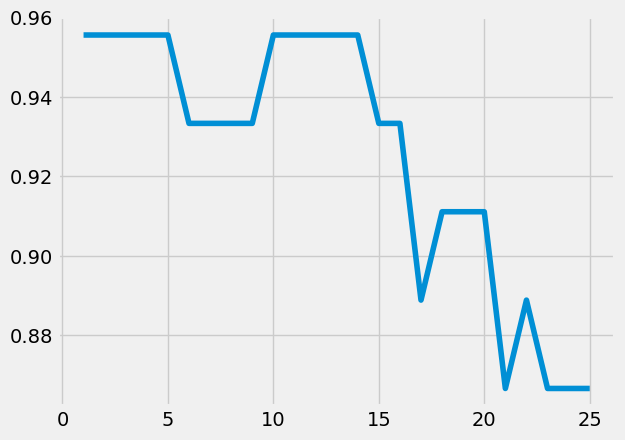

In [66]:
plt.plot(k_range,scores_list)

In [67]:
#K MEANS Clustering

In [68]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

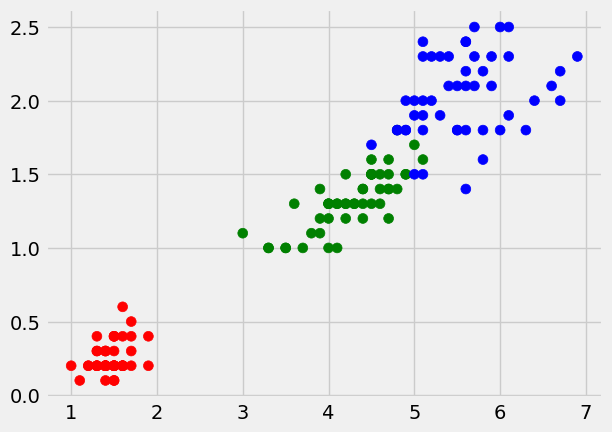

In [69]:
colormap=np.array(['Red','green','blue'])
fig=plt.scatter(df['PetalLength'],df['PetalWidth'],c=colormap[y],s=50)

In [70]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

In [72]:
from sklearn.cluster import KMeans

# Initialize KMeans without n_jobs parameter
km = KMeans(n_clusters=3, random_state=2)

# Fit the model
km.fit(x)


KMeans(n_clusters=3, random_state=2)

In [73]:
centers=km.cluster_centers_
print(centers)

[[5.885      2.74166667 4.37666667 1.42666667]
 [5.01041667 3.43125    1.4625     0.25      ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


In [74]:

km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

In [75]:
Catagory_kmeans=['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']

In [76]:
Catagory_kmeans

['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']

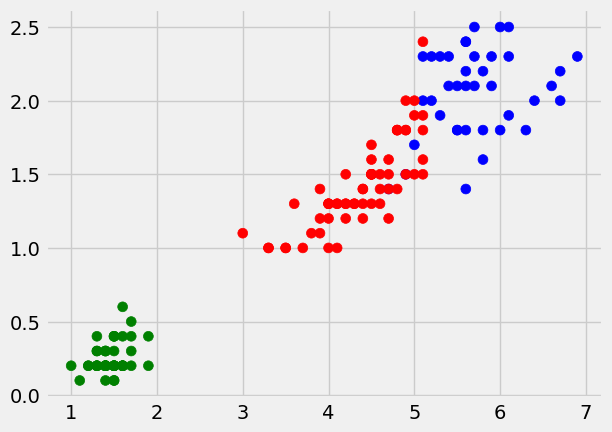

In [77]:
colormap=np.array(['Red','green','blue'])
fig=plt.scatter(df['PetalLength'],df['PetalWidth'],c=colormap[km.labels_],s=50)

Text(0.5, 1.0, 'Predicted')

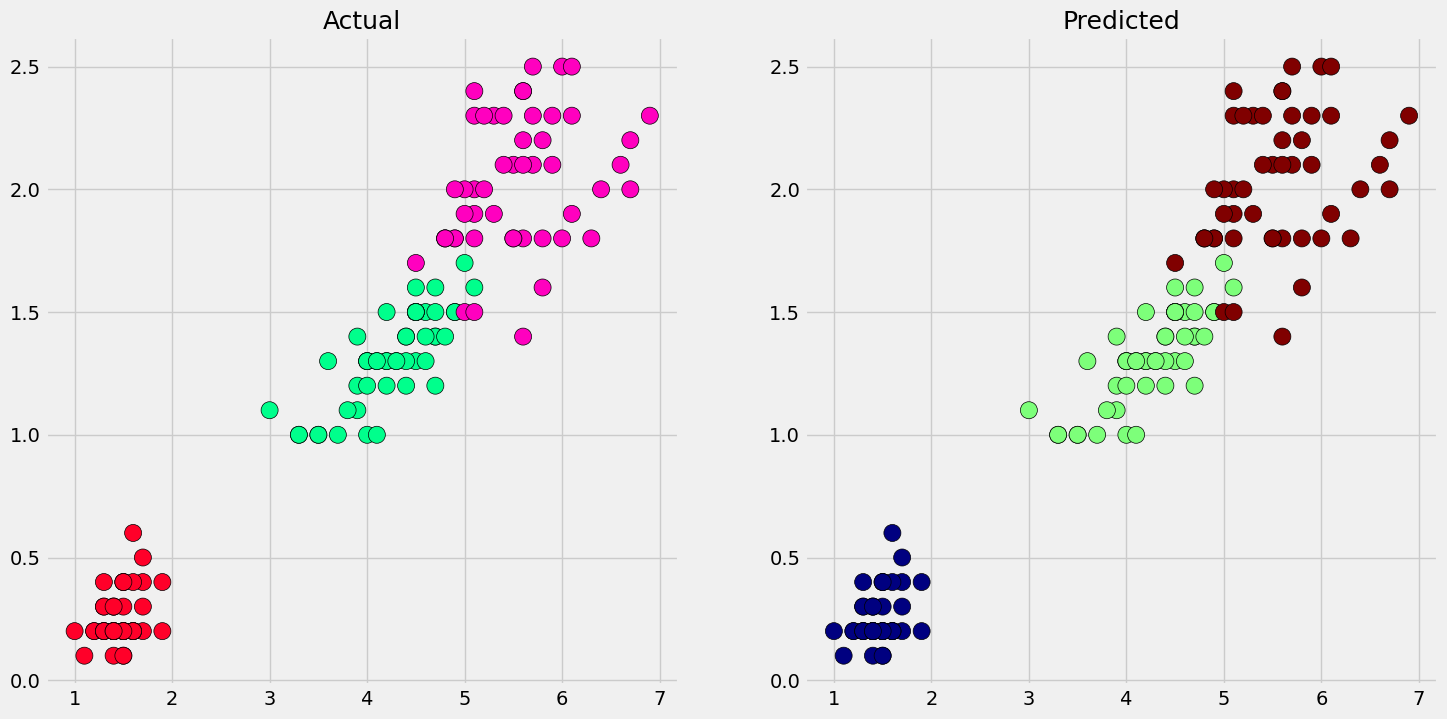

In [78]:
new_labels=km.labels_
fig,axes=plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(x[:,2],x[:,3],c=y,cmap='gist_rainbow',edgecolor='k',s=150)
axes[1].scatter(x[:,2],x[:,3],c=y,cmap='jet',edgecolor='k',s=150)
axes[0].set_title('Actual',fontsize=18)
axes[1].set_title('Predicted',fontsize=18)

In [79]:
#Lets predict on custom input value

In [80]:

X_km=np.array([[1 ,1, 1, 1]])

In [81]:
X_km_prediction=km.predict(X_km)
X_km_prediction[0]
print(Catagory_kmeans[int(X_km_prediction[0])])

Iris-Setosa


In [82]:
Catagory=['Iris-Setosa','Iris-Versicolor','Iris-Virginica']

In [83]:
from sklearn.metrics import silhouette_score

# Assuming km is your fitted KMeans model
silhouette_avg = silhouette_score(x, km.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5493074238267263


In [84]:
from joblib import dump

# Save the trained model to a file
dump(DT, 'decision_tree_model.joblib')


['decision_tree_model.joblib']

In [85]:
from joblib import load

# Load the saved model from a file
loaded1_DT = load('decision_tree_model.joblib')


In [86]:
X_DT=np.array([[1 ,1, 1, 1]])
X_DT_prediction1=loaded1_DT.predict(X_DT)


In [87]:
X_DT_prediction1[0]
print(Catagory[int(X_DT_prediction1[0])])

Iris-Setosa


In [88]:
import pickle

# Save the trained model to a file
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(DT, f)


In [89]:
import pickle

# Load the saved model from a file
with open('decision_tree_model.pkl', 'rb') as f:
    loaded_DT2 = pickle.load(f)


In [90]:
X_DT=np.array([[1 ,1, 1, 1]])
X_DT_prediction2=loaded_DT2.predict(X_DT)

In [91]:
X_DT_prediction2[0]
print(Catagory[int(X_DT_prediction2[0])])

Iris-Setosa
